# deepface tests
##人脸识别流程的五个关键阶段：
- 检测（detect）、
- 对齐(align)、
- 归一化(normalize)、
- 特征表示(represent)
- 验证(verfify)
  
**DeepFace 库自动处理这些过程，无需深入了解其背后机制。
通过简单的函数调用，用户可以进行人脸验证、查找和分析功能。
具体来说，验证功能会比较两张人脸，判断它们是否属于同一人，
并返回一个包含验证结果的字典。**

参考链接： https://github.com/serengil/deepface/tree/master?tab=readme-ov-file


In [1]:
#!pip install deepface
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def draw_face_bounding_box(image_path, facial_areas):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    x, y, w, h = facial_areas['x'], facial_areas['y'], facial_areas['w'], facial_areas['h']
    left_eye = facial_areas['left_eye']
    right_eye = facial_areas['right_eye']
    
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)  # 用蓝色框出面部区域
    
    cv2.circle(image_rgb, left_eye, 10, (0, 255, 0), -1)  # 左眼: 绿色圆点
    cv2.circle(image_rgb, right_eye, 10, (0, 255, 0), -1)  # 右眼: 绿色圆点

    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

In [3]:
DeepFace.__version__

'0.0.93'

## 1. face verification
比较两张人脸图像，判断它们是否属于同一个人

In [4]:
img1 = 'test/dataset/img18.jpg'
img2 = 'test/dataset/img19.jpg'
model_name = "VGG-Face"   # dedault
detector_backend = "opencv"   # dedault
similarity_metric = "cosine"  # dedault

### models:
- "VGG-Face", 
- "Facenet", 
- "Facenet512", 
- "OpenFace", 
- "DeepFace", 
- "DeepID", 
- "ArcFace", 
- "Dlib", 
- "SFace",
- "GhostFaceNet",



| 模型             | 模型大小 | RAM 占用  | 推理速度              | CPU/GPU 需求         | 树莓派适应性     |
| ---------------- | -------- | --------- | --------------------- | -------------------- | ---------------- |
| **VGG-Face**     | 约 500MB | 3-4GB     | 较慢，几秒            | 高计算需求，GPU 推荐 | 不适合           |
| **FaceNet**      | 约 90MB  | 1-2GB     | 中等，几百毫秒到 1 秒 | 中等需求             | 较适合           |
| **FaceNet512**   | 约 140MB | 1-2GB     | 中等，几百毫秒到 1 秒 | 中等需求             | 可用，但需要优化 |
| **OpenFace**     | 约 100MB | 500MB-1GB | 快，几百毫秒          | 低需求               | 非常适合         |
| **DeepFace**     | 约 90MB  | 1-2GB     | 中等，500 毫秒到 1 秒 | 中等需求             | 可以运行，需优化 |
| **DeepID**       | 约 50MB  | 500MB-1GB | 快，几百毫秒          | 低到中等需求         | 适合低要求场景   |
| **ArcFace**      | 约 100MB | 1-2GB     | 中等，1 秒左右        | 高需求，推荐 GPU     | 可能过重         |
| **Dlib**         | 约 60MB  | 500MB-1GB | 快，几百毫秒          | 低需求               | 非常适合         |
| **SFace**        | 约 80MB  | 1-2GB     | 中等，500 毫秒到 1 秒 | 中等需求             | 可以运行，需优化 |
| **GhostFaceNet** | 约 50MB  | 500MB     | 非常快，低于 500 毫秒 | 非常低需求           | 非常适合         |

针对树莓派 5 的特定 CPU 和 GPU 需求。一般来说，像 **VGG-Face** 和 **ArcFace** 这样的模型在部署时会受益于 GPU 加速，而轻量级的模型（如 **Dlib** 和 **OpenFace**）可以更好地在 CPU 上运行。

> **树莓派 5（8GB）的硬件限制：**
> 
> CPU：ARM Cortex-A76 处理器（相较于台式机或服务器，性能较弱）。
> 
> RAM：8GB（足够运行较小或中等模型，但大型模型可能会占满内存）。
> 
> 没有内置 GPU：依赖 CPU 进行计算，除非使用外部硬件加速器。



> **模型选择：**
> 
> 高效模型：对于树莓派 5（8GB），OpenFace、Dlib 和 GhostFaceNet 是非常好的选择。它们轻量级且适合嵌入式应用。
> 
> 中等性能：如果你追求更高的准确性，可以选择 FaceNet（128 维）或 DeepID，但需要进行一定的性能优化。
> 
> 大型模型：VGG-Face 和 ArcFace 对于树莓派来说可能过于庞大，可能需要额外的硬件加速，或者在有充足计算资源的环境中运行。
--- 

### metrics:
- ["cosine", "euclidean", "euclidean_l2"]

DeepFace 默认使用余弦相似度作为度量方式，但可以根据需要切换到其他度量方式。根据实验结果，这些距离度量方法在不同场景下表现各有千秋


### backends:
- 'opencv', 
-  'ssd', 
-  'dlib', 
-  'mtcnn', 
-  'fastmtcnn',
-  'retinaface', 
-  'mediapipe',
-  'yolov8',
-  'yunet',
-  'centerface',


In [5]:
verify_res = DeepFace.verify(img1_path=img1, img2_path=img2, model_name=model_name, detector_backend=detector_backend)

In [6]:
verify_res

{'verified': True,
 'distance': 0.2703925272274189,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 317,
   'y': 221,
   'w': 550,
   'h': 550,
   'left_eye': (666, 439),
   'right_eye': (492, 445)},
  'img2': {'x': 207,
   'y': 211,
   'w': 709,
   'h': 709,
   'left_eye': (677, 510),
   'right_eye': (445, 488)}},
 'time': 1.49}

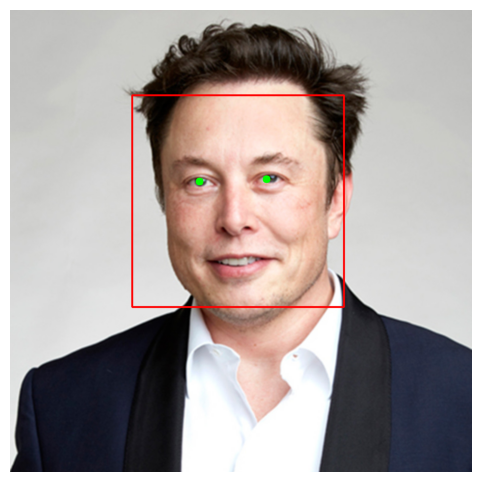

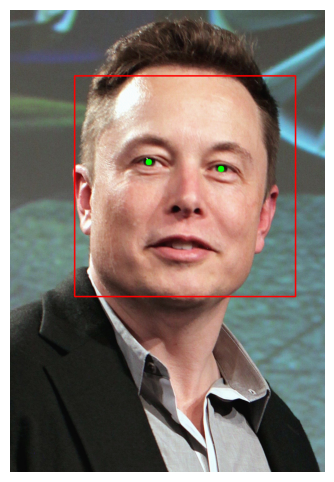

In [7]:
if verify_res['verified'] and verify_res['facial_areas']:
    img1_area = verify_res['facial_areas']['img1']
    draw_face_bounding_box(img1, img1_area)
    img2_area = verify_res['facial_areas']['img2']
    draw_face_bounding_box(img2, img2_area)

## 2. face recognition 
DeepFace 提供了一个find函数，可以自动在数据库路径中查找输入图像的身份

24-09-12 23:37:38 - Searching test/dataset/img51.jpg in 72 length datastore
24-09-12 23:37:38 - find function duration 0.2571587562561035 seconds


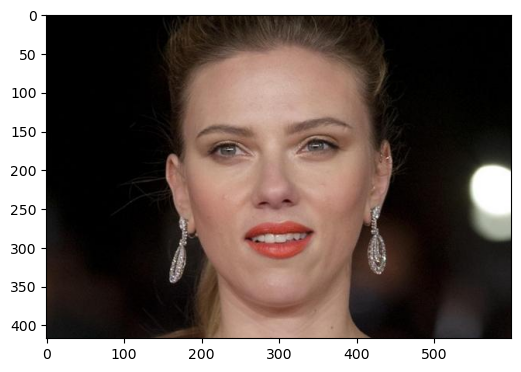

In [8]:
img51_path = 'test/dataset/img51.jpg'
img51 = cv2.imread(img51_path)
img51_rgb = cv2.cvtColor(img51, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img51_rgb)

find_res = DeepFace.find(
  img_path = img51_path,
  db_path = "test/dataset/",
)

In [9]:
find_res

[                 identity                                      hash  target_x  \
 0  test/dataset/img51.jpg  f514d45c8af2c50caf4711f1d8e3c6f7dd7c00a0       136   
 1  test/dataset/img50.jpg  4e4b99b91e3bed3b5d29c8ec0168db9181452405       103   
 2   test/dataset/img9.jpg  87ee659d668b5076c31ef310f7262b269f8c1ea7       170   
 3  test/dataset/img49.jpg  2410e8e9bd439e2a25eadb398f34ca8f1e1d046a      1839   
 4  test/dataset/img48.jpg  a490f91d7ed42b5481e999d6301ed43fde84552a       142   
 5   test/dataset/img8.jpg  9fc882af1422e8a981bf1cf85b6d57de5d85922c       155   
 
    target_y  target_w  target_h  source_x  source_y  source_w  source_h  \
 0        47       320       320       136        47       320       320   
 1       107       204       204       136        47       320       320   
 2       269       644       644       136        47       320       320   
 3       453      1318      1318       136        47       320       320   
 4       201       426       426       136  

## 3. Embeddings
> 人脸识别模型如何将面部图像表示为多维向量，称为嵌入向量。
> DeepFace 提供了represent函数，专门用于返回图像的嵌入列表。
> 每个嵌入的维度根据模型不同而不同，比如默认的 VGG-Face 模型会将面部表示为 4096 维向量。
> 通过遍历这些嵌入对象，可以检查每个嵌入的大小，并根据颜色条形图直观了解每个维度的值。

In [10]:
# Visualize the embeddings
def plot_embedding(embedding_objs):
    for embedding_obj in embedding_objs:
        embedding = embedding_obj["embedding"]
        if isinstance(embedding, list):
            embedding = np.array(embedding)
        assert isinstance(embedding, np.ndarray), "Embedding must be a numpy array"
        assert len(embedding) == 4096, "Expected embedding size for VGG-Face is 4096"

        plt.figure(figsize=(10, 2))
        plt.plot(embedding)
        plt.title(f"Embedding (4096 dimensions)")
        plt.xlabel("Dimensions")
        plt.ylabel("Values")
        plt.show()

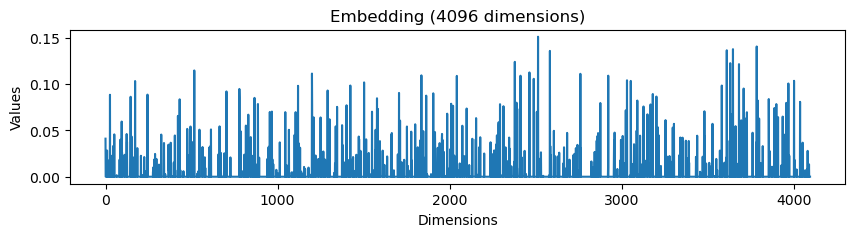

In [11]:
img_embed = 'test/dataset/img2.jpg'
embedding_objs = DeepFace.represent(
  img_path = img_embed
)
for embedding_obj in embedding_objs:
  embedding = embedding_obj["embedding"]
  assert isinstance(embedding, list)
  assert (
    model_name == "VGG-Face"
    and len(embedding) == 4096
  )
# embedding_objs = [{'embedding': np.random.randn(4096)}]

plot_embedding(embedding_objs)

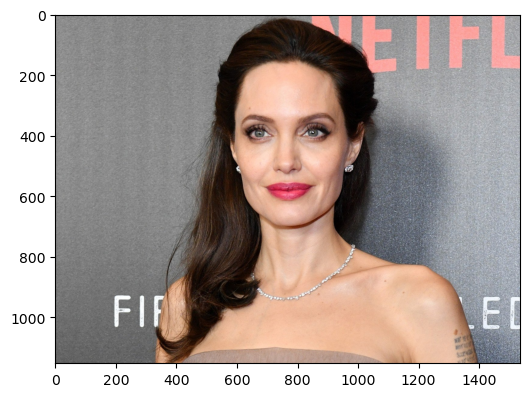

In [12]:
img_embed_rgb = cv2.cvtColor(cv2.imread(img_embed), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(img_embed_rgb)

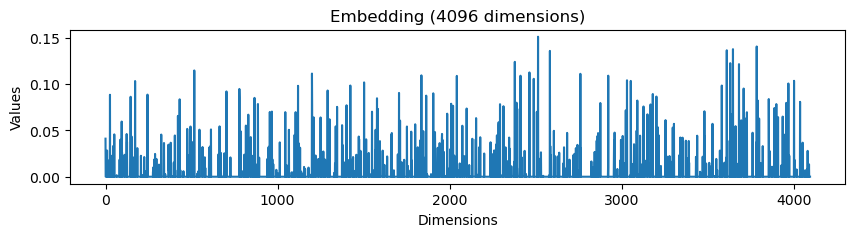

In [13]:
plot_embedding(embedding_objs)

## 4. Facial Attribute Analysis
DeepFace 提供的一个强大的人脸属性分析模块，该模块能够预测以下内容：
年龄（age）
性别（gender）
面部表情（facial expression）：包括愤怒、恐惧、平静、悲伤、厌恶、快乐和惊讶。
种族（race）：包括亚洲、白人、中东人、印度人、拉丁裔和黑人。


**性别模型具有较高的准确性、精确率和召回率，而年龄模型的预测误差在 4.65 岁左右**
**性别模型预测： 97.44% accuracy, 96.29% precision and 95.05% recall**

Action: emotion: 100%|██████████████████████████████████████████████████████| 4/4 [00:01<00:00,  2.23it/s]


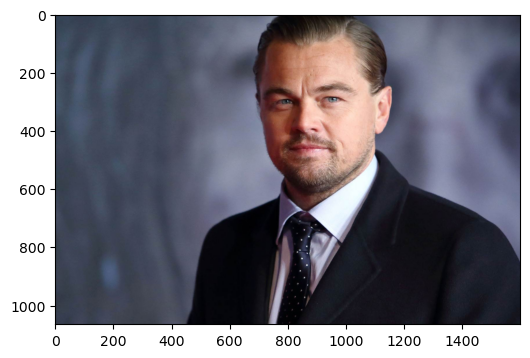

In [14]:
test_img = "test/dataset/img34.jpg"
objs_4 = DeepFace.analyze(
  img_path = "test/dataset/img34.jpg", 
  actions = ['age', 'gender', 'race', 'emotion'],
)
test_img_rgb = cv2.cvtColor(cv2.imread(test_img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 6))
plt.imshow(test_img_rgb)

In [15]:
objs_4

[{'age': 39,
  'region': {'x': 653,
   'y': 109,
   'w': 476,
   'h': 476,
   'left_eye': (938, 296),
   'right_eye': (794, 301)},
  'face_confidence': 0.91,
  'gender': {'Woman': 5.868592438673659e-05, 'Man': 99.99994039535522},
  'dominant_gender': 'Man',
  'race': {'asian': 0.012054127746561215,
   'indian': 0.04783293709846591,
   'black': 0.0033744966983230997,
   'white': 81.14119396910739,
   'middle eastern': 8.328120907769096,
   'latino hispanic': 10.467416290352787},
  'dominant_race': 'white',
  'emotion': {'angry': 0.7296817842870951,
   'disgust': 9.181230211652291e-05,
   'fear': 0.03209782298654318,
   'happy': 0.018996305880136788,
   'sad': 0.963971670717001,
   'surprise': 0.0005368350230128272,
   'neutral': 98.25462102890015},
  'dominant_emotion': 'neutral'}]

## 5. Face Detection and Alignment
### 人脸识别流程中的两个关键步骤：人脸检测和人脸对齐，它们是提高人脸识别准确率的重要阶段。

- 人脸检测：通过检测图像中的面部，可以确保识别系统只对面部区域进行分析。实验表明，检测过程可以将人脸识别准确率提高 42%。

- 人脸对齐：对齐是通过调整人脸的角度、位置等，使其在统一的坐标系中进行处理。对齐可以进一步将准确率提高 6%。

(人脸识别过程中，使用的模型本质上是卷积神经网络（CNN）模型，这些模型期望输入的图像具有标准的尺寸。
因此，在进行人脸特征表示（embedding）之前，需要对图像进行缩放处理，以确保输入符合模型的要求。)

DeepFace 集成了多种流行的检测器，包括：

- OpenCV  默认参数这个
- SSD
- Dlib
- MTCNN
- Faster MTCNN
- RetinaFace
- MediaPipe
- YOLO
- YuNet
- CenterFace


RetinaFace 不仅在人群中能够有效检测到多张人脸，还能精确地检测出面部的关键特征点，显著提升了检测和对齐的准确性

> RetinaFace 和 MTCNN：
> 检测和对齐效果更好：这两种方法在检测面部位置和对齐时，通常能够提供更高的准确性。
> 速度较慢：由于它们的算法较为复杂，处理速度相对较慢。要求高精度识别，RetinaFace 和 MTCNN 是很好的选择，但会以牺牲速度为代价。

> OpenCV 和 SSD：
> 速度更快：相比 RetinaFace 和 MTCNN，OpenCV 和 SSD 在速度上有明显优势，适合需要快速处理的应用场景。
> 准确度较低：虽然速度快，但在检测和对齐的准确性上，OpenCV 和 SSD 的表现不如 RetinaFace 和 MTCNN。



In [16]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

alignment_modes = [True, False]


#face detection and alignment
face_objs = DeepFace.extract_faces(
  img_path = "test/dataset/img35.jpg", 
  detector_backend = backends[5],   ##  'retinaface'
  align = alignment_modes[0],  ## true
)

In [17]:
face_objs

[{'face': array([[[0.04313725, 0.04313725, 0.0627451 ],
          [0.04313725, 0.04705882, 0.06666667],
          [0.05882353, 0.05490196, 0.07843137],
          ...,
          [0.10980392, 0.09411765, 0.09803922],
          [0.14117647, 0.1254902 , 0.12941176],
          [0.11764706, 0.10588235, 0.10196078]],
  
         [[0.03921569, 0.04705882, 0.06666667],
          [0.05490196, 0.05882353, 0.07843137],
          [0.06666667, 0.0627451 , 0.08627451],
          ...,
          [0.11372549, 0.10588235, 0.10588235],
          [0.12941176, 0.10980392, 0.11372549],
          [0.10588235, 0.09019608, 0.09019608]],
  
         [[0.05098039, 0.05490196, 0.0745098 ],
          [0.05098039, 0.05882353, 0.07843137],
          [0.05882353, 0.05490196, 0.07843137],
          ...,
          [0.10980392, 0.10588235, 0.10980392],
          [0.1254902 , 0.10980392, 0.10980392],
          [0.09411765, 0.08627451, 0.08235294]],
  
         ...,
  
         [[0.19215686, 0.20784314, 0.25098039],
      

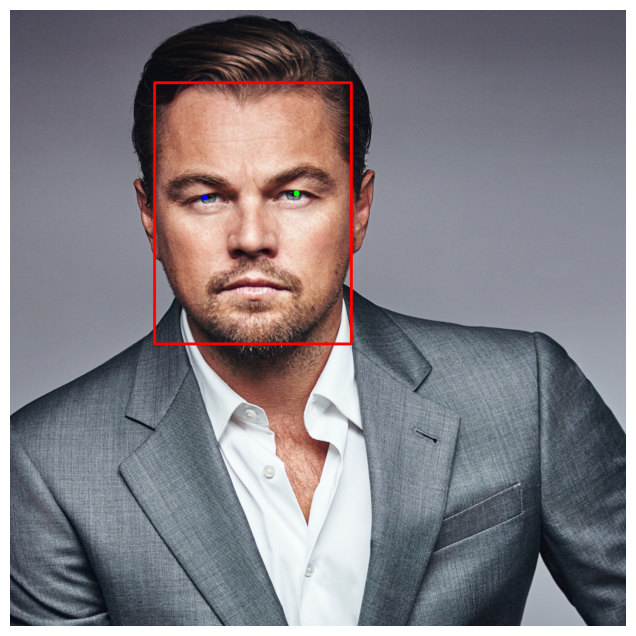

In [18]:
image35 = cv2.imread("test/dataset/img35.jpg")
image35_rgb = cv2.cvtColor(image35, cv2.COLOR_BGR2RGB) 

for face_obj in face_objs:
    facial_area = face_obj["facial_area"]
    x = facial_area["x"]
    y = facial_area["y"]
    w = facial_area["w"]
    h = facial_area["h"]
    cv2.rectangle(image35_rgb, (x, y), (x + w, y + h), (255, 0, 0), 3)  
    
    left_eye = facial_area["left_eye"]
    right_eye = facial_area["right_eye"]
    cv2.circle(image35_rgb, left_eye, 5, (0, 255, 0), -1) 
    cv2.circle(image35_rgb, right_eye, 5, (0, 0, 255), -1) 

plt.figure(figsize=(8, 8))
plt.imshow(image35_rgb)
plt.axis("off")  
plt.show()

## 6. Real Time Analysis 实时视频分析：

### 实时视频分析：
使用 DeepFace 的 stream 函数，调用摄像头进行实时人脸检测和分析。DeepFace 不仅可以进行人脸识别，还可以执行人脸属性分析（如年龄、性别、情绪等）。
### 分析机制：
该函数会在视频流中连续捕捉画面，只有在连续5帧图像中检测到面部后，才开始进行分析。这样做可以避免因为短暂遮挡或摄像头抖动引起的错误检测。
### 结果显示：
当检测到人脸后，DeepFace 会进行识别和属性分析，并在接下来的5秒内显示结果


使用场景： 适合实时应用场景，比如视频监控、访客系统或其他需要实时人脸识别和分析的系统。

数据库中，一个user可以配置多张图片，
user
├── database
│   ├── Alice
│   │   ├── Alice1.jpg
│   │   ├── Alice2.jpg
│   ├── Bob
│   │   ├── Bob.jpg

In [ ]:
DeepFace.stream(db_path = "test/user/database/")
# 由于集成多了模型展示，运行起来会比较卡顿，

24-09-12 23:43:05 - Age model is just built
24-09-12 23:43:05 - Gender model is just built
24-09-12 23:43:05 - Emotion model is just built
24-09-12 23:43:05 - VGG-Face is built


2024-09-12 23:43:05.552 python[6307:125301] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


24-09-12 23:43:14 - Hello, test/user/database/hankin/hankin.jpg
24-09-12 23:43:14 - freezed
24-09-12 23:43:19 - freeze released
24-09-12 23:43:22 - freezed
24-09-12 23:43:27 - freeze released
24-09-12 23:43:29 - freezed
24-09-12 23:43:34 - freeze released
24-09-12 23:43:37 - Hello, test/user/database/hankin/hankin.jpg
24-09-12 23:43:37 - freezed
24-09-12 23:43:42 - freeze released
24-09-12 23:43:44 - freezed
24-09-12 23:43:49 - freeze released
24-09-12 23:43:52 - freezed
24-09-12 23:43:57 - freeze released
24-09-12 23:43:59 - Hello, test/user/database/hankin/hankin.jpg
24-09-12 23:43:59 - freezed
24-09-12 23:44:04 - freeze released
24-09-12 23:44:08 - freezed
24-09-12 23:44:13 - freeze released
24-09-12 23:44:15 - Hello, test/user/database/hankin/hankin.jpg
24-09-12 23:44:15 - freezed
24-09-12 23:44:20 - freeze released
24-09-12 23:44:26 - freezed
24-09-12 23:44:31 - freeze released
24-09-12 23:44:33 - freezed
24-09-12 23:44:38 - freeze released
24-09-12 23:44:40 - freezed
24-09-12 23:

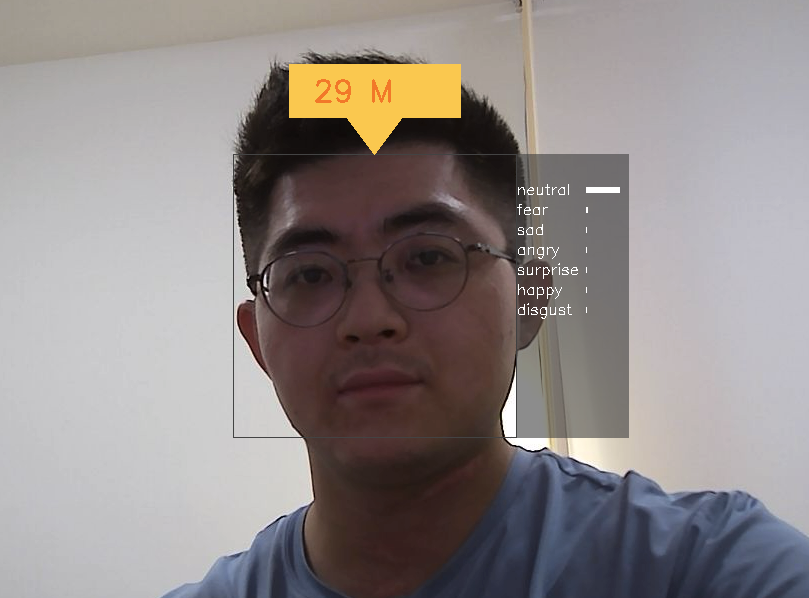

Action: gender:  50%|███████████████████████████▌                           | 1/2 [00:00<00:00,  5.95it/s]


KeyboardInterrupt: 